## We’re going to train the neuron to solve the problem below. 

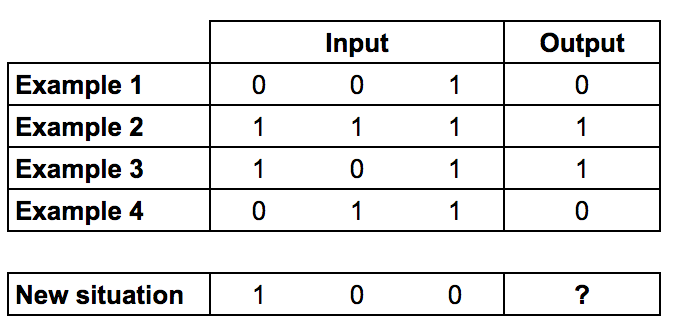

## The general neural network looks like this
(we will not be adding hidden layers here, such network is also called as perceptron)

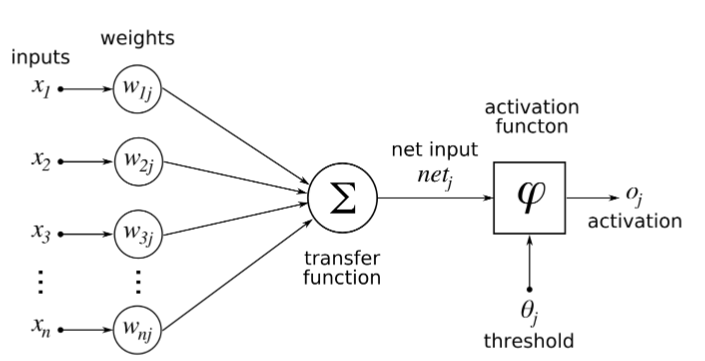

## How are we going to do this?

As you can see in the diagram, we have some input then we give each input some weight. the weight can be either positive or negative number. And this weight will have a strong effect on the neuron's output.

### Training process

1. Take the inputs from a training set example, adjust them by the weights, and pass them through a special formula to calculate the neuron’s output.
2. Calculate the error, which is the difference between the neuron’s output and the desired output in the training set example.
3. Depending on the direction of the error, adjust the weights slightly.
4. Repeat this process 10, 000 times.



### How to calculate weights?
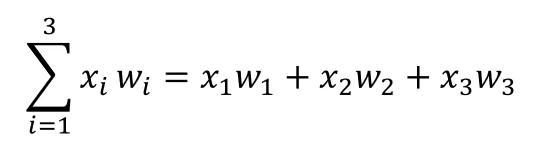

After calculating the weights, we normalize them using some activation function. (for this one we will be using sigmoid function which normalizes the results between 0 and 1).


The sigmoid formula is given as follows:
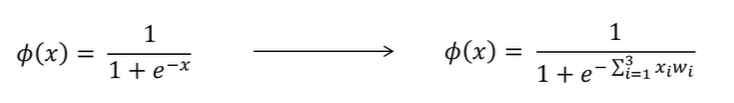

and if you plot this sigmoid function on graph, it will sort of look like this:


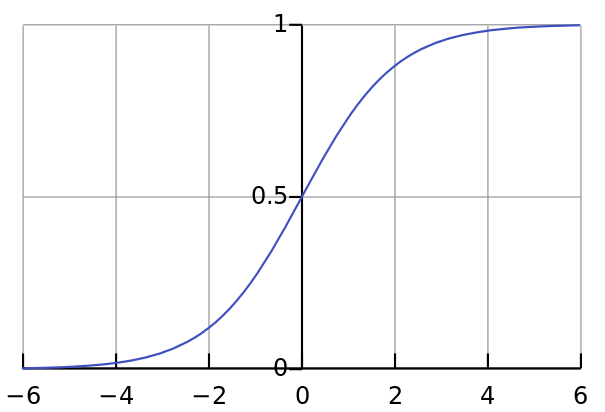

# Let's try to convert everything above into a "workable" python code

In [11]:
import numpy as np

#create sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [12]:
#generate training example

train_data = np.array([[0, 0 ,1],
                      [1, 1, 1],
                      [1, 0, 1],
                      [0, 1, 1]])

train_output = np.array([[0, 1, 1, 0]]).T

In [13]:
#geneate weights

# We model a single neuron, with 3 input connections and 1 output connection.
# We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1 and mean 0.

np.random.seed(1)

weights = 2 * np.random.random((3 , 1)) - 1 
weights

array([[-0.16595599],
       [ 0.44064899],
       [-0.99977125]])

In [14]:
for i in range(1):
    outputs = sigmoid(np.dot(train_data, weights))
print(outputs)

[[0.2689864 ]
 [0.3262757 ]
 [0.23762817]
 [0.36375058]]


weights = 0 . (-0.16595599) + 0 . (0.44064899) + 1 . (-0.99977125) = -0.9999


sigmoid = 1 / 1 + e ^ -(-0.999) = 0.2689864

## Error weighted derivative

Now you see the outputs are way off. It is because we have not managed the weights and they are randomly generated.

__adjusted weights__ = *error.input.SigmoidCurveGradient(output)* 

First we want to make the adjustment proportional to the size of the error. Secondly, we multiply by the input, which is either a 0 or a 1. If the input is 0, the weight isn’t adjusted. Finally, we multiply by the gradient of the Sigmoid curve.

1. We used the Sigmoid curve to calculate the output of the neuron.
2. If the output is a large positive or negative number, it signifies the neuron was quite confident one way or another.
3. In sigmoid graph, we can see that at large numbers, the Sigmoid curve has a shallow gradient.
4. If the neuron is confident that the existing weight is correct, it doesn’t want to adjust it very much. Multiplying by the Sigmoid curve gradient achieves this.

here error can be calculated as 
__error__ = *output - actual output*

and the SigmoidCurveGradient as follows:

__SigmoidCurveGradient(output)__ = *output . (1 - output)*

# Putting everything all together

In [15]:
def SCG(x):
    return x * (1 - x)

In [40]:
for i in range(50000):
    
    inputs = train_data
    
    # Pass the training set through our neural network (a single neuron).
    outputs = sigmoid(np.dot(inputs, weights))
    
    
    # Calculate the error (The difference between the desired output and the predicted output)
    error = train_output - outputs
    
    
    # Multiply the error by the input and again by the gradient of the Sigmoid curve.
    # This means less confident weights are adjusted more.
    # This means inputs, which are zero, do not cause changes to the weights.
    adjusted_weights = error * SCG(outputs)
    
    #  newly adjusted weights.
    weights += np.dot(inputs.T, adjusted_weights)

print(weights)  
print("------")
print(outputs)

[[12.65470784]
 [-0.20395516]
 [-6.12365041]]
------
[[0.00218566]
 [0.99821598]
 [0.99854465]
 [0.00178313]]


# putting everything into a class

In [39]:
class NeuralNetwork():
    def __init__(self):
        
        np.random.seed(1)

       
        self.weights = 2 * np.random.random((3, 1)) - 1

    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

   
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            
            output = self.percept(training_set_inputs)

          
            error = training_set_outputs - output

            
            adjusted_weights = np.dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))

         
            self.weights += adjusted_weights

    
    def percept(self, inputs):
        
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(np.dot(inputs, self.weights))


if __name__ == "__main__":

    #Intialise a single neuron neural network.
    neural_network = NeuralNetwork()

    print("Random starting weights:")
    print(neural_network.weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = np.array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = np.array([[0, 1, 1, 0]]).T

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjusted_weightss each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print("New adjusted weights after training: ")
    print(neural_network.weights)

    # Test the neural network with a new situation.
    print(" [1, 0, 0] -> ?: ")
    print(neural_network.percept(np.array([1, 0, 0])))

Random starting weights:
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New adjusted weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
predict for [1, 0, 0] -> ?: 
[0.99993704]
